In [85]:
import pyproj
import pooch
import pandas as pd
import numpy as np
import xarray as xr
import verde as vd
import boule as bl
import harmonica as hm
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rcParams
rcParams["figure.dpi"] = 150

In [37]:
# Importar dados
# Dados do projeto Cachoiera do Curuá
data = pd.read_csv('data/1134_MagLine.XYZ', skiprows=[1], sep = '\s+')

C:\Users\agrog\AppData\Local\Temp\ipykernel_14824\929123045.py:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/1134_MagLine.XYZ', skiprows=[1], sep = '\s+')


In [4]:
data

,X,Y,FIDUCIAL,GPSALT,BARO,ALTURA,MDT,MAGBASE,MAGBRU,MAGCOM,MAGCOR,MAGNIV,MAGMIC,MAGIGRF,IGRF,LONGITUDE,LATITUDE,DATA,HORA
0,554648,9059335,1062.0,525.00,506.25,107.07,417.93,24188.441,24574.597,24566.675,24580.855,24579.587,24576.724,31.022,24545.702,-56.503472,-8.509550,2015/07/18,17:55:34.0
1,554648,9059342,1062.1,525.09,506.25,107.32,417.77,24188.441,24574.861,24566.902,24581.025,24579.757,24576.894,31.175,24545.719,-56.503471,-8.509482,2015/07/18,17:55:34.1
2,554648,9059350,1062.2,525.17,506.25,106.10,419.07,24188.442,24575.103,24567.109,24581.182,24579.914,24577.051,31.316,24545.735,-56.503471,-8.509414,2015/07/18,17:55:34.2
3,554648,9059357,1062.3,525.26,506.25,107.37,417.89,24188.442,24575.324,24567.296,24581.330,24580.062,24577.200,31.448,24545.752,-56.503470,-8.509347,2015/07/18,17:55:34.3
4,554648,9059365,1062.4,525.34,506.25,103.70,421.64,24188.442,24575.528,24567.466,24581.469,24580.201,24577.339,31.571,24545.768,-56.503470,-8.509279,2015/07/18,17:55:34.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315983,696143,9103761,12313.3,396.66,378.45,90.98,305.68,24210.686,24677.192,24680.606,24671.611,24680.065,24679.639,48.878,24630.761,-55.219930,-8.104132,2016/07/02,14:38:13.3
5315984,696143,9103754,12313.4,396.82,378.53,91.16,305.66,24210.686,24677.050,24680.448,24671.619,24680.071,24679.661,48.915,24630.746,-55.219929,-8.104194,2016/07/02,14:38:13.4
5315985,696143,9103747,12313.5,396.98,378.59,88.63,308.35,24210.686,24676.958,24680.345,24671.682,24680.133,24679.740,49.009,24630.731,-55.219928,-8.104255,2016/07/02,14:38:13.5
5315986,696143,9103740,12313.6,397.14,378.65,89.15,307.99,24210.686,24676.917,24680.297,24671.804,24680.252,24679.878,49.162,24630.716,-55.219926,-8.104316,2016/07/02,14:38:13.6


In [38]:


# Coordenadas dos levantamentos
long_all = data.LONGITUDE
lat_all = data.LATITUDE
# Anomalia de Campo Total
act_all = data.MAGCOR



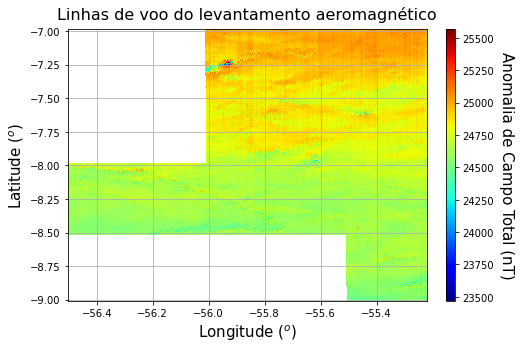

In [39]:
figure1 = plt.figure(figsize=(7,5))

p1 = plt.scatter(long_all, lat_all, s = 1., c = act_all, marker = '.', cmap = plt.cm.jet)
cbar1 = plt.colorbar(p1, aspect = 30, fraction = 0.03, orientation = 'vertical')
cbar1.set_label('Anomalia de Campo Total (nT)',fontsize = 15, rotation = -90, labelpad = 20)

plt.title('Linhas de voo do levantamento aeromagnético',fontsize = 16, pad = 10)
plt.xlabel('Longitude ($^o$)', fontsize = 15)
plt.ylabel('Latitude ($^o$)', fontsize = 15)
plt.xlim(long_all.min(), long_all.max())
plt.ylim(lat_all.min(), lat_all.max())

# plt.savefig('figure01-flight-lines.png', dpi = 300, transparence = True, bbox_inches = 'tight')
# plt.savefig('figure01-flight-lines.pdf', dpi = 300, transparence = True, bbox_inches = 'tight')
plt.grid()
plt.show()

In [41]:
# Slice a smaller portion of the survey data to speed-up calculations for this
# example
region = [-55.8, -55.7,-7.5, -7.25]
# Obtenha uma matriz com as coordenadas do conjunto de dados
# que estão dentro da região de corte: 
inside = vd.inside((data.LONGITUDE, data.LATITUDE), region)

# Obtenha um conjunto de dados menor e substitua-o no original:
data = data[inside]
print("Number of data points:", data.shape[0])
print("Mean height of observations:", data.ALTURA.mean())

Number of data points: 83082
Mean height of observations: 105.12093221155003


In [42]:
long_cut = np.array(data.LONGITUDE)
lat_cut = np.array(data.LATITUDE)
act_cut = np.array(data.MAGCOR)

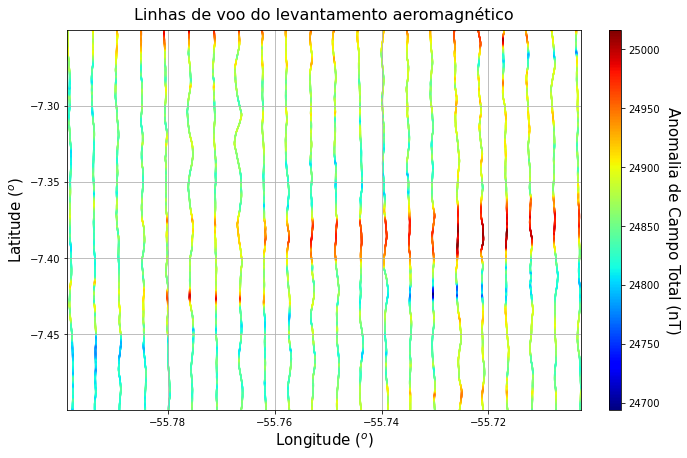

In [43]:
figure1 = plt.figure(figsize=(10,7))

p1 = plt.scatter(long_cut, lat_cut, s = 1., c = act_cut, marker = '.', cmap = plt.cm.jet)
cbar1 = plt.colorbar(p1, aspect = 30, fraction = 0.03, orientation = 'vertical')
cbar1.set_label('Anomalia de Campo Total (nT)',fontsize = 15, rotation = -90, labelpad = 20)

plt.title('Linhas de voo do levantamento aeromagnético',fontsize = 16, pad = 10)
plt.xlabel('Longitude ($^o$)', fontsize = 15)
plt.ylabel('Latitude ($^o$)', fontsize = 15)
plt.xlim(long_cut.min(), long_cut.max())
plt.ylim(lat_cut.min(), lat_cut.max())

# plt.savefig('figure01-flight-lines.png', dpi = 300, transparence = True, bbox_inches = 'tight')
# plt.savefig('figure01-flight-lines.pdf', dpi = 300, transparence = True, bbox_inches = 'tight')
plt.grid()
plt.show()

In [74]:
# Since this is a small area, we'll project our data and use Cartesian
# coordinates
projection = pyproj.Proj(proj="merc", lat_ts=data.LATITUDE.mean())
easting, northing = projection(data.LONGITUDE.values, data.LATITUDE.values)
coordinates = (easting, northing, data.ALTURA)
xy_region = vd.get_region((easting, northing))

In [61]:
# Create the equivalent sources.
# We'll use block-averaged sources at a constant depth beneath the observation
# points. We will interpolate on a grid with a resolution of 250m, so we will
# use blocks of the same size. The damping parameter helps smooth the predicted
# data and ensure stability.
eqs = hm.EquivalentSources(depth=1000, damping=1, block_size=500, depth_type="constant")

In [46]:
data

,X,Y,FIDUCIAL,GPSALT,BARO,ALTURA,MDT,MAGBASE,MAGBRU,MAGCOM,MAGCOR,MAGNIV,MAGMIC,MAGIGRF,IGRF,LONGITUDE,LATITUDE,DATA,HORA
1937352,632646,9170796,4209.0,351.74,335.48,83.93,267.81,24172.130,24772.540,24767.663,24797.257,24807.784,24807.516,20.180,24787.336,-55.797808,-7.499997,2015/08/06,11:45:02.0
1937353,632646,9170803,4209.1,351.75,335.48,83.82,267.93,24172.129,24772.401,24767.538,24797.254,24807.783,24807.520,20.168,24787.352,-55.797808,-7.499931,2015/08/06,11:45:02.1
1937354,632646,9170810,4209.2,351.76,335.48,85.05,266.71,24172.128,24772.291,24767.443,24797.315,24807.846,24807.589,20.220,24787.369,-55.797808,-7.499866,2015/08/06,11:45:02.2
1937355,632646,9170818,4209.3,351.77,335.48,86.78,264.99,24172.127,24772.220,24767.387,24797.450,24807.983,24807.732,20.347,24787.385,-55.797808,-7.499801,2015/08/06,11:45:02.3
1937356,632646,9170825,4209.4,351.79,335.48,84.40,267.39,24172.126,24772.202,24767.383,24797.667,24808.203,24807.957,20.555,24787.402,-55.797808,-7.499735,2015/08/06,11:45:02.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414404,643131,9170804,5962.2,396.47,374.85,122.09,274.38,24195.191,24829.029,24834.419,24840.457,24844.460,24843.804,57.717,24786.087,-55.702805,-7.499658,2015/08/09,12:08:28.2
2414405,643131,9170796,5962.3,396.40,374.67,120.89,275.51,24195.191,24828.808,24834.196,24840.121,24844.126,24843.471,57.402,24786.069,-55.702804,-7.499730,2015/08/09,12:08:28.3
2414406,643131,9170788,5962.4,396.32,374.49,121.78,274.54,24195.192,24828.552,24833.941,24839.742,24843.749,24843.094,57.044,24786.050,-55.702803,-7.499802,2015/08/09,12:08:28.4
2414407,643131,9170780,5962.5,396.24,374.32,120.16,276.08,24195.192,24828.256,24833.647,24839.322,24843.331,24842.677,56.645,24786.032,-55.702803,-7.499873,2015/08/09,12:08:28.5


In [62]:
# Fit the sources coefficients to the observed magnetic anomaly.
eqs.fit(coordinates, data.MAGCOR)

EquivalentSources(block_size=500, damping=1, depth=1000, depth_type='constant')

In [63]:
# Evaluate the data fit by calculating an R² score against the observed data.
# This is a measure of how well the sources fit the data, NOT how good the
# interpolation will be.
print("R² score:", eqs.score(coordinates, data.MAGCOR))

R² score: 0.4938352327340423


C:\Users\agrog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\verde\base\base_classes.py:359: FutureWarning: The default scoring will change from R² to negative root mean squared error (RMSE) in Verde 2.0.0. This may change model selection results slightly.
  warnings.warn(


In [69]:
# Interpolate data on a regular grid with 500 m spacing. The interpolation
# requires the height of the grid points (upward coordinate). By passing in
# 1500 m, we're effectively upward-continuing the data (mean flight height is
# 500 m).
grid_coords = vd.grid_coordinates(region=region, spacing=500, extra_coords=1500)
print(grid_coords)
grid = eqs.grid(coordinates=grid_coords,upward= data.ALTURA.mean(), data_names=["magnetic_anomaly"])

(array([[-55.8]]), array([[-7.5]]), array([[1500.]]))


In [70]:
# The grid is a xarray.Dataset with values, coordinates, and metadata
print("\nGenerated grid:\n", grid)


Generated grid:
 <xarray.Dataset>
Dimensions:           (northing: 1, easting: 1)
Coordinates:
  * easting           (easting) float64 -55.8
  * northing          (northing) float64 -7.5
    upward            (northing, easting) float64 1.5e+03
Data variables:
    magnetic_anomaly  (northing, easting) float64 32.71
Attributes:
    metadata:  Generated by EquivalentSources(block_size=500, damping=1, dept...


In [75]:
# Set figure properties
w, e, s, n = xy_region
fig_height = 10
fig_width = fig_height * (e - w) / (n - s)
fig_ratio = (n - s) / (fig_height / 100)
fig_proj = f"x1:{fig_ratio}"

In [82]:
# Plot original magnetic anomaly and the gridded and upward-continued version
fig = pygmt.Figure()

NameError: name 'pygmt' is not defined

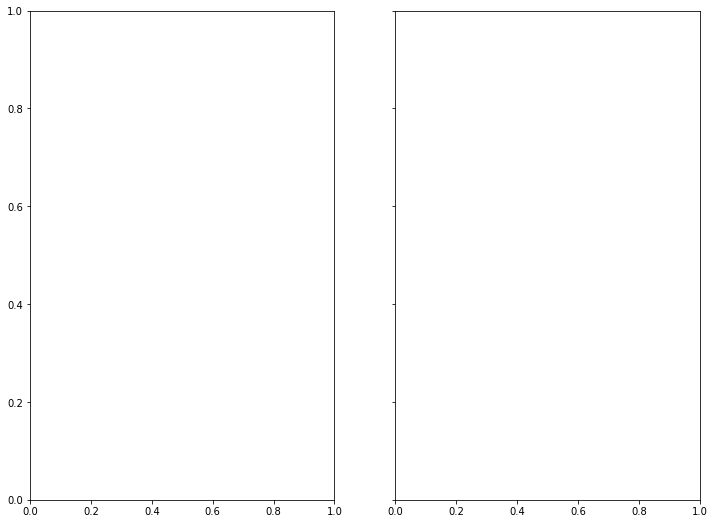

In [66]:
# Plot original magnetic anomaly and the gridded and upward-continued version
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 9), sharey=True)

In [67]:
# Get the maximum absolute value between the original and gridded data so we
# can use the same color scale for both plots and have 0 centered at the white
# color.
maxabs = vd.maxabs(data.MAGCOR, grid.magnetic_anomaly.values)
print(maxabs)

25016.629


In [58]:
data.MAGCOR

1937352    24797.257
1937353    24797.254
1937354    24797.315
1937355    24797.450
1937356    24797.667
             ...    
2414404    24840.457
2414405    24840.121
2414406    24839.742
2414407    24839.322
2414408    24838.864
Name: MAGCOR, Length: 83082, dtype: float64

C:\Users\agrog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xarray\plot\plot.py:1482: UserWarning: Attempting to set identical left == right == -55.8 results in singular transformations; automatically expanding.
  ax.set_xlim(x[0], x[-1])
C:\Users\agrog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xarray\plot\plot.py:1483: UserWarning: Attempting to set identical bottom == top == -7.5 results in singular transformations; automatically expanding.
  ax.set_ylim(y[0], y[-1])


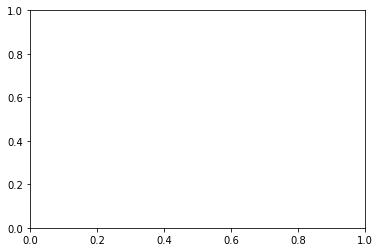

In [68]:
# Get the maximum absolute value between the original and gridded data so we
# can use the same color scale for both plots and have 0 centered at the white
# color.
ax1.set_title("Observed magnetic anomaly data")
tmp = ax1.scatter(
    easting,
    northing,
    c=data.MAGCOR,
    s=20,
    vmin=-maxabs,
    vmax=maxabs,
    cmap="seismic",
)
plt.colorbar(tmp, ax=ax1, label="nT", pad=0.05, aspect=40, orientation="horizontal")
ax1.set_xlim(easting.min(), easting.max())
ax1.set_ylim(northing.min(), northing.max())

ax2.set_title("Gridded and upward-continued")
tmp = grid.magnetic_anomaly.plot.pcolormesh(
    ax=ax2,
    add_colorbar=False,
    add_labels=False,
    vmin=-maxabs,
    vmax=maxabs,
    cmap="seismic",
)
plt.colorbar(tmp, ax=ax2, label="nT", pad=0.05, aspect=40, orientation="horizontal")
ax2.set_xlim(easting.min(), easting.max())
ax2.set_ylim(northing.min(), northing.max())

plt.show()

(-824882.1735535393, -797234.3386395732)

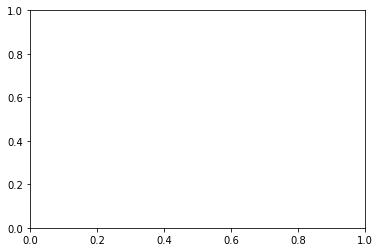

In [60]:
ax1.set_title("Observed magnetic anomaly data")
tmp = ax1.scatter(
    easting,
    northing,
    c=data.MAGCOR,
    s=20,
    vmin=-maxabs,
    vmax=maxabs,
    cmap="seismic",
)
plt.colorbar(tmp, ax=ax1, label="nT", pad=0.05, aspect=40, orientation="horizontal")
ax1.set_xlim(easting.min(), easting.max())
ax1.set_ylim(northing.min(), northing.max())